***While clustering improved the matching process, it had limitations in dynamic scenarios. In this final iteration, we use a graph-based approach where riders and passengers are represented as nodes, and potential matches are edges with weights based on a dynamic scoring system.***



---



# **`Importing Libraries`**

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# **`Reading Data`**

In [27]:
riders = pd.DataFrame({
    'rider_id': [1, 2, 3, 4, 5, 6],
    'pickup_location': [(10, 10), (22, 19), (15, 12), (32, 28), (34, 40), (25, 18)],
    'dropoff_location': [(50, 45), (60, 52), (55, 58), (70, 66), (75, 70), (65, 63)],
    'pickup_time': ['08:00', '09:00', '10:00', '11:00', '12:00', '13:00']
})

# Sample data for passengers with more varied locations
passengers = pd.DataFrame({
    'passenger_id': [101, 102, 103, 104, 105, 106],
    'pickup_location': [(12, 8), (28, 22), (17, 15), (34, 29), (36, 45), (29, 24)],
    'dropoff_location': [(52, 48), (65, 58), (54, 63), (72, 68), (76, 73), (68, 65)],
    'preferred_time': ['08:15', '09:15', '10:10', '11:15', '12:15', '13:15']
})

# **`Creating a graph with nodes as riders and passengers`**

In [28]:
# Create a bipartite graph G with riders and passengers
G = nx.Graph()

# Adding rider nodes
for _, rider in riders.iterrows():
    G.add_node(('rider', rider['rider_id']), bipartite=0)

# Adding passenger nodes
for _, passenger in passengers.iterrows():
    G.add_node(('passenger', passenger['passenger_id']), bipartite=1)

# Adding edges with weights (e.g., distance between pickup locations)
for _, rider in riders.iterrows():
    for _, passenger in passengers.iterrows():
        distance = np.linalg.norm(np.array(rider['pickup_location']) - np.array(passenger['pickup_location']))
        G.add_edge(('rider', rider['rider_id']), ('passenger', passenger['passenger_id']), weight=-distance)

# **`Visualizing the graph`**

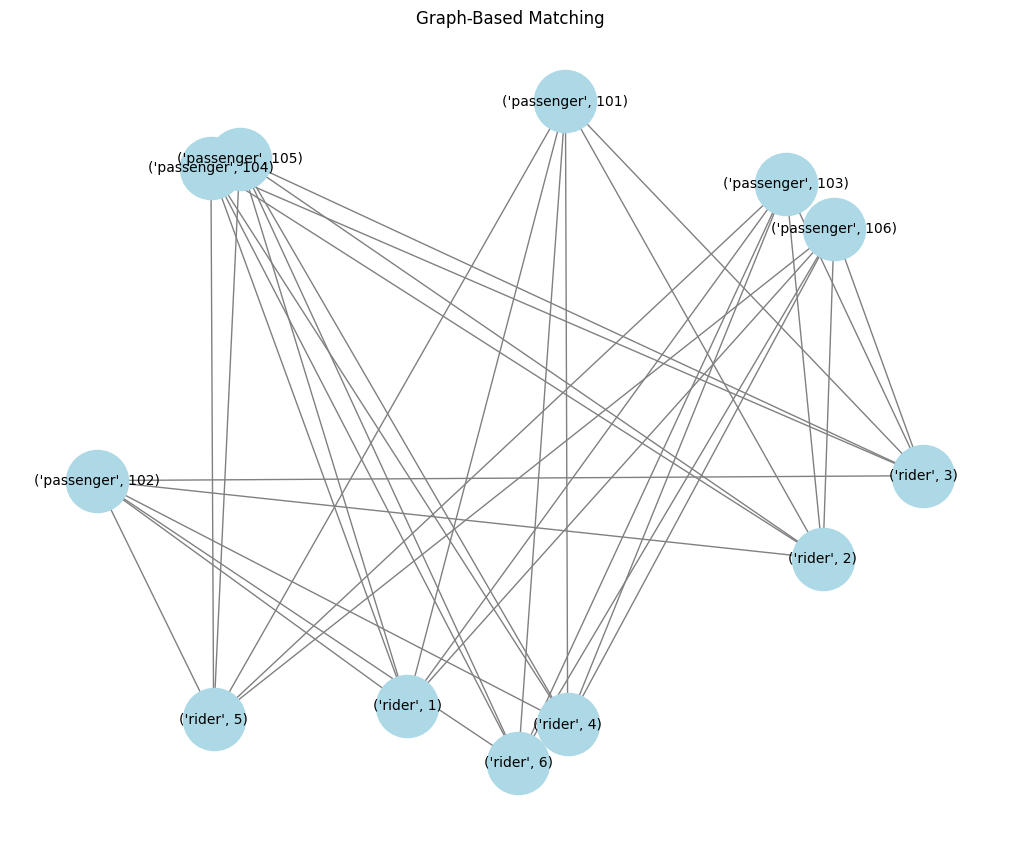

In [29]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
plt.title('Graph-Based Matching')
plt.show()

# **`Dynamic Optimization Function`**

In [30]:
# Finding optimal matches using minimum weight matching

matches_3 = nx.algorithms.matching.max_weight_matching(G, maxcardinality=True)
print("Iteration 3 - Graph-Based Matches:", matches_3)

Iteration 3 - Graph-Based Matches: {(('rider', 6), ('passenger', 102)), (('rider', 4), ('passenger', 104)), (('rider', 3), ('passenger', 103)), (('rider', 1), ('passenger', 101)), (('rider', 5), ('passenger', 105)), (('rider', 2), ('passenger', 106))}


# **`Solution`**

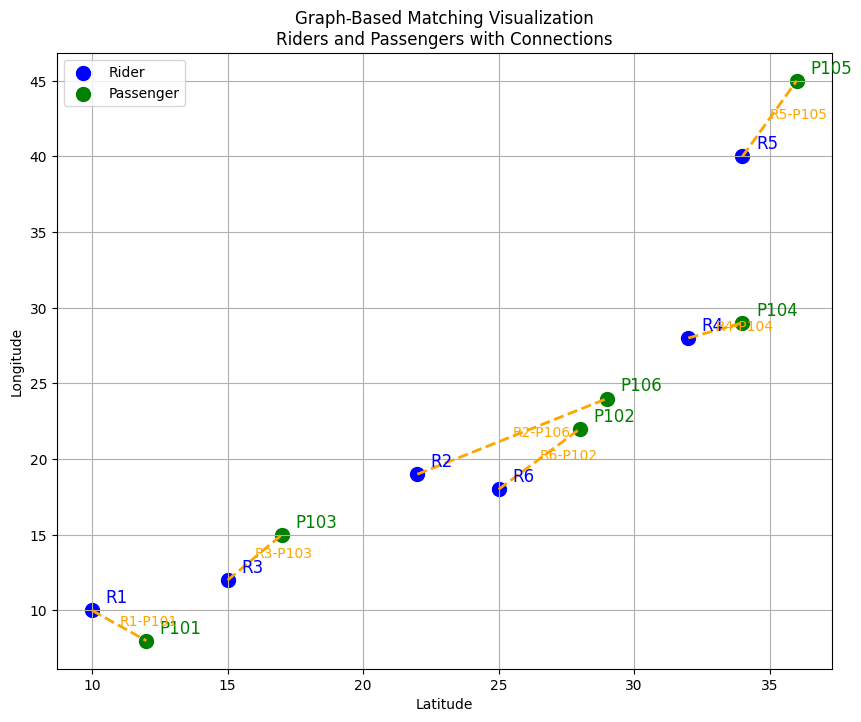

In [31]:
plt.figure(figsize=(10, 8))

# Plot rider locations
for _, rider in riders.iterrows():
    plt.scatter(rider['pickup_location'][0], rider['pickup_location'][1], color='blue', label='Rider' if rider['rider_id'] == 1 else "", s=100)
    plt.text(rider['pickup_location'][0] + 0.5, rider['pickup_location'][1] + 0.5, f"R{rider['rider_id']}", fontsize=12, color='blue')

# Plot passenger locations
for _, passenger in passengers.iterrows():
    plt.scatter(passenger['pickup_location'][0], passenger['pickup_location'][1], color='green', label='Passenger' if passenger['passenger_id'] == 101 else "", s=100)
    plt.text(passenger['pickup_location'][0] + 0.5, passenger['pickup_location'][1] + 0.5, f"P{passenger['passenger_id']}", fontsize=12, color='green')

# Plot lines between matched pairs
for rider_node, passenger_node in matches_3:
    if rider_node[0] == 'rider':
        rider_id, passenger_id = rider_node[1], passenger_node[1]
    else:
        rider_id, passenger_id = passenger_node[1], rider_node[1]

    # Ensure we're getting array-like structures
    rider_rows = riders.loc[riders['rider_id'] == rider_id, 'pickup_location'].values
    passenger_rows = passengers.loc[passengers['passenger_id'] == passenger_id, 'pickup_location'].values

    # Proceed only if both rider and passenger locations are found
    if rider_rows.size == 0:
        print(f"Rider ID {rider_id} not found in riders DataFrame")
        continue

    if passenger_rows.size == 0:
        print(f"Passenger ID {passenger_id} not found in passengers DataFrame")
        continue

    rider_loc = rider_rows[0]  # Correctly indexed array value
    passenger_loc = passenger_rows[0]  # Correctly indexed array value

    # Plot the connection between the rider and passenger
    plt.plot([rider_loc[0], passenger_loc[0]], [rider_loc[1], passenger_loc[1]], color='orange', linestyle='--', linewidth=2)
    plt.text((rider_loc[0] + passenger_loc[0]) / 2, (rider_loc[1] + passenger_loc[1]) / 2, f"R{rider_id}-P{passenger_id}", fontsize=10, color='orange')

# Adding descriptive elements to the plot
plt.legend()
plt.title('Graph-Based Matching Visualization\nRiders and Passengers with Connections')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()